In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

In [8]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "flowers/"

gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Load Data
train_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path), #klasy nazwij tak, jak nazywają się foldery w folderze flowers
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="training"
)

valid_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path),
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="validation"
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [9]:
classes = os.listdir(root_path) #stwórz listę, w której będą nazwy klas. Stwórz ją na podstawie nazw folderów

In [10]:
classes

['daisy', 'dandelion', 'rose', 'tulip', 'sunflower']

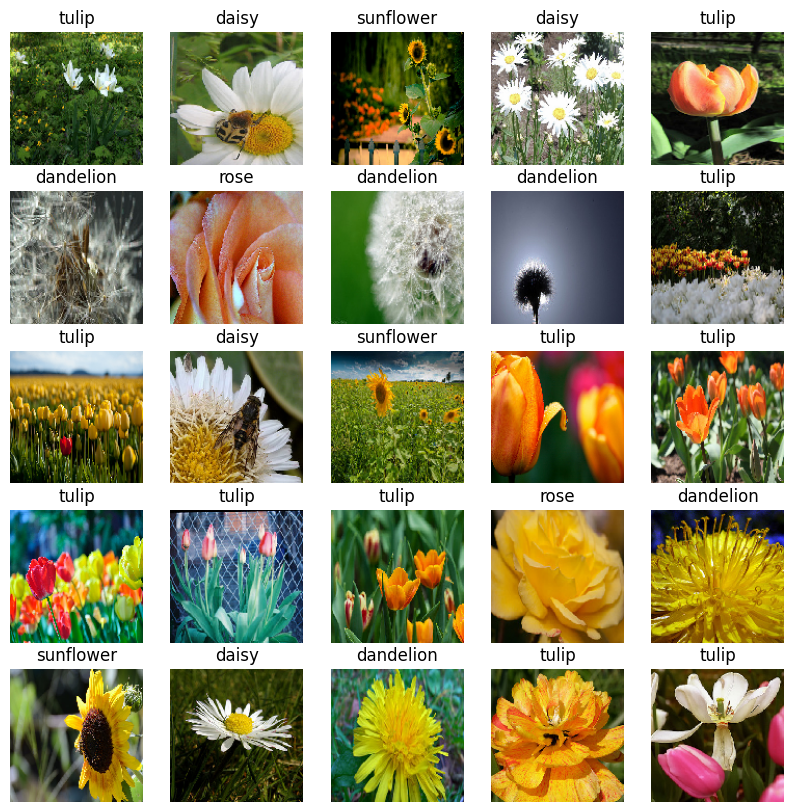

In [11]:
plt.figure(figsize=(10,10))
img, label = train_ds.next()
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(classes[np.argmax(label[i,:])])
    
# ponieważ labele są w formacie [0,0,1,0,0], poleceniem argmax sprawdzamy, na którym miejscu
# jest jedynka. W powyższym przykładzie na pozycji 2. Oznacza to, że taki label wskazuje 
# na "rose".
# classes[np.argmax(label[i,:])] ->
# classes[np.argmax([0,0,1,0,0])] ->
# classes[2] -> "rose"

    

In [12]:
model = Sequential()
model.add(Conv2D(filters =32, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds, epochs=EPOCHS, validation_data=(valid_ds), callbacks = [es])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 63, 63, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                      

2023-12-04 12:09:23.941391: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


109/109 [==============================] - ETA: 0s - loss: 1.3981 - accuracy: 0.4698

2023-12-04 12:09:35.466178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


109/109 [==============================] - 14s 115ms/step - loss: 1.3981 - accuracy: 0.4698 - val_loss: 1.5000 - val_accuracy: 0.2721
Epoch 2/100
109/109 [==============================] - 13s 119ms/step - loss: 0.9311 - accuracy: 0.6358 - val_loss: 1.5159 - val_accuracy: 0.3140
Epoch 3/100
109/109 [==============================] - 13s 120ms/step - loss: 0.8871 - accuracy: 0.6529 - val_loss: 1.2527 - val_accuracy: 0.4942
Epoch 4/100
109/109 [==============================] - 13s 118ms/step - loss: 0.7810 - accuracy: 0.7000 - val_loss: 1.2444 - val_accuracy: 0.4721
Epoch 5/100
109/109 [==============================] - 13s 122ms/step - loss: 0.6716 - accuracy: 0.7423 - val_loss: 0.8812 - val_accuracy: 0.6616
Epoch 6/100
109/109 [==============================] - 13s 119ms/step - loss: 0.5723 - accuracy: 0.7839 - val_loss: 1.0268 - val_accuracy: 0.5756
Epoch 7/100
109/109 [==============================] - 13s 119ms/step - loss: 0.4731 - accuracy: 0.8253 - val_loss: 0.9017 - val_accurac

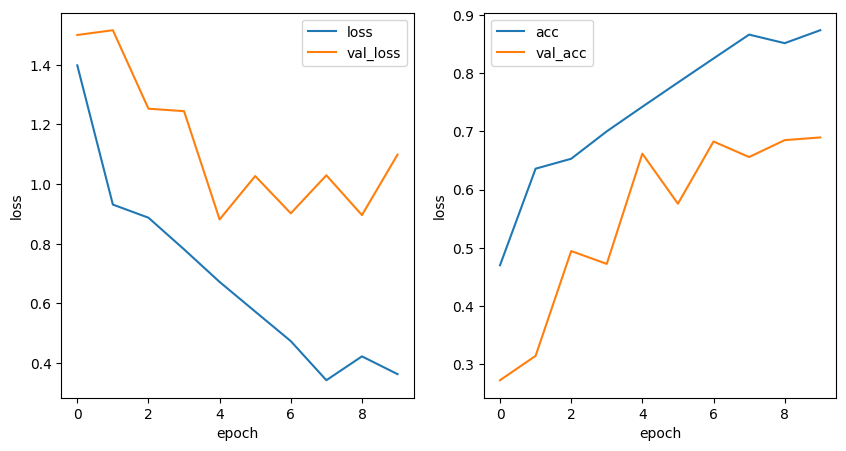

In [13]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

In [14]:
gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2
)

train_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path),
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="training"
)

valid_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path),
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="validation"
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [15]:
model = Sequential()
model.add(Conv2D(filters =16, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

model.compile(optimizer="adam", loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_ds, epochs=EPOCHS, validation_data=(valid_ds), callbacks = [es])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 63, 63, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                      

2023-12-04 12:11:37.767409: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


109/109 [==============================] - ETA: 0s - loss: 1.4250 - accuracy: 0.4440

2023-12-04 12:12:01.255197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


109/109 [==============================] - 29s 252ms/step - loss: 1.4250 - accuracy: 0.4440 - val_loss: 1.4841 - val_accuracy: 0.3337
Epoch 2/100
109/109 [==============================] - 26s 241ms/step - loss: 1.1095 - accuracy: 0.5519 - val_loss: 1.3950 - val_accuracy: 0.3756
Epoch 3/100
109/109 [==============================] - 26s 243ms/step - loss: 1.0139 - accuracy: 0.5855 - val_loss: 1.4135 - val_accuracy: 0.4058
Epoch 4/100
109/109 [==============================] - 25s 232ms/step - loss: 0.9427 - accuracy: 0.6306 - val_loss: 1.1488 - val_accuracy: 0.5442
Epoch 5/100
109/109 [==============================] - 26s 243ms/step - loss: 0.9098 - accuracy: 0.6433 - val_loss: 1.0316 - val_accuracy: 0.6000
Epoch 6/100
109/109 [==============================] - 27s 247ms/step - loss: 0.8865 - accuracy: 0.6572 - val_loss: 0.9139 - val_accuracy: 0.6372
Epoch 7/100
109/109 [==============================] - 27s 249ms/step - loss: 0.8579 - accuracy: 0.6711 - val_loss: 0.8815 - val_accurac

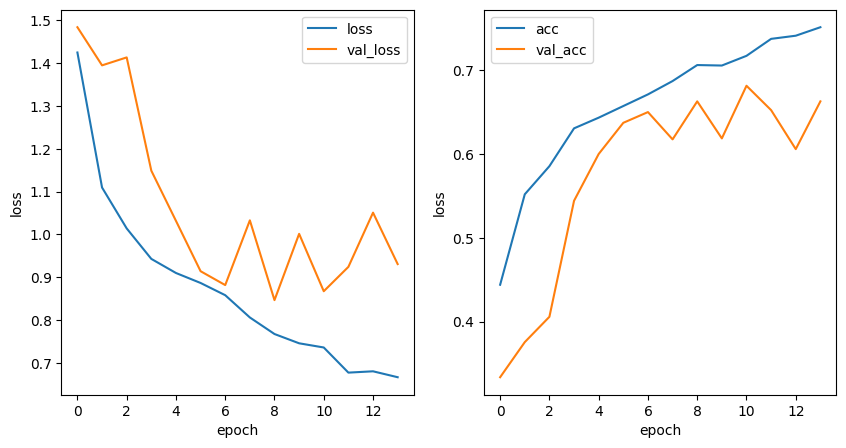

In [16]:
hist = pd.DataFrame(history.history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "acc")
plt.plot(hist.val_accuracy, label = "val_acc")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()